In [12]:
import pandas as pd
df = pd.read_csv('hospital_deaths_train.csv')
import seaborn as sns

In [3]:
df.head()

,recordid,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,135031,0,69.0,1.0,172.7,63.7,0,0,0,59.0,...,119.0,4.6,NaN,17.2,63.7,7.41,105.0,2580.0,1.0,12.0
1,132988,0,72.0,1.0,NaN,NaN,0,0,0,NaN,...,NaN,NaN,0.23,21.9,NaN,NaN,NaN,NaN,NaN,NaN
2,136292,0,29.0,0.0,NaN,90.0,0,0,0,37.0,...,124.0,NaN,NaN,11.1,106.3,7.40,103.0,2700.0,1.0,14.0
3,133122,0,73.0,1.0,175.3,89.1,0,1,0,58.0,...,148.0,NaN,NaN,18.3,94.2,7.45,144.0,2115.0,0.0,12.0
4,142184,0,74.0,0.0,NaN,78.0,0,0,1,47.0,...,187.0,NaN,NaN,17.7,NaN,7.26,75.0,2280.0,0.0,18.0


In [6]:
df.describe()

,recordid,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
count,3250.000000,3250.000000,3250.000000,3247.000000,1735.000000,2992.000000,3250.000000,3250.000000,3250.000000,2256.000000,...,2257.000000,163.000000,709.000000,3177.000000,2215.00000,2460.000000,2060.000000,2060.000000,2060.000000,2060.000000
mean,137595.911692,0.138769,64.119692,0.568525,172.633034,81.618834,0.144308,0.218462,0.275077,62.277926,...,122.208684,6.376074,1.020169,12.214385,85.21851,7.399146,292.907282,1907.607282,0.623301,12.357282
std,2942.099376,0.345759,17.576185,0.495358,92.168659,23.252955,0.351456,0.413266,0.446622,14.176536,...,23.641406,8.957512,2.269628,5.723662,24.24268,0.060648,494.125117,873.445042,0.484676,5.936406
min,132539.000000,0.000000,15.000000,0.000000,121.900000,35.000000,0.000000,0.000000,0.000000,4.000000,...,7.000000,0.300000,0.010000,1.000000,35.00000,7.030000,0.000000,0.000000,0.000000,1.000000
25%,135032.250000,0.000000,52.000000,0.000000,162.600000,66.075000,0.000000,0.000000,0.000000,53.000000,...,106.000000,0.700000,0.040000,8.500000,68.75000,7.370000,54.000000,1158.750000,0.000000,7.000000
50%,137580.500000,0.000000,67.000000,1.000000,170.200000,78.800000,0.000000,0.000000,0.000000,61.000000,...,120.000000,2.000000,0.140000,11.200000,82.40000,7.410000,125.000000,2310.000000,1.000000,13.000000
75%,140106.750000,0.000000,78.000000,1.000000,177.800000,92.200000,0.000000,0.000000,1.000000,71.000000,...,138.000000,8.450000,0.810000,14.700000,97.85000,7.440000,244.250000,2670.000000,1.000000,16.000000
max,142673.000000,1.000000,90.000000,1.000000,3960.000000,280.000000,1.000000,1.000000,1.000000,141.000000,...,260.000000,46.000000,22.510000,63.200000,280.00000,7.660000,2859.000000,2870.000000,1.000000,38.000000


In [18]:
np.unique(df['In-hospital_death'], return_counts=True)

(array([0, 1], dtype=int64), array([2799,  451], dtype=int64))

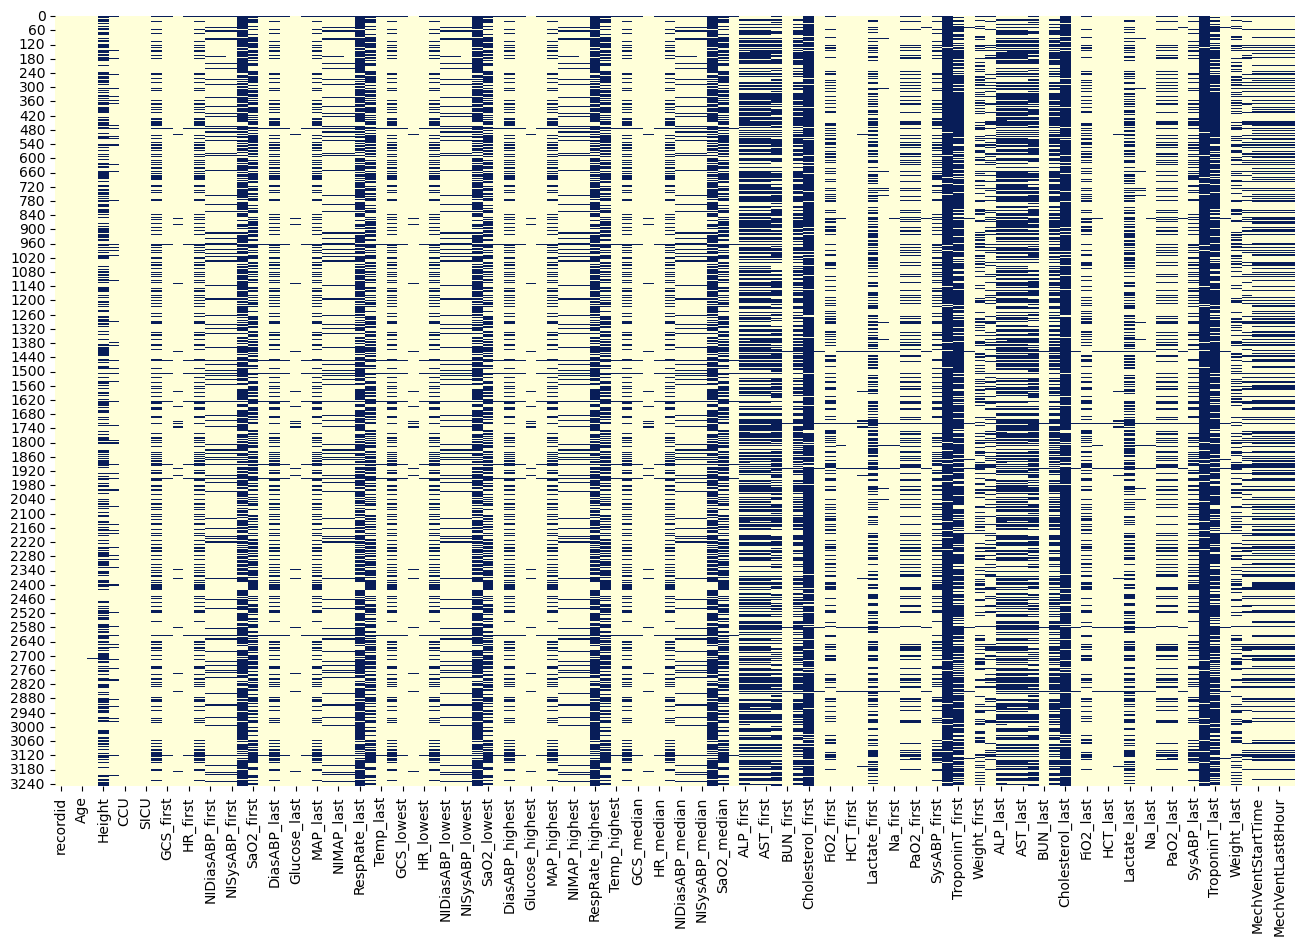

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pickle
from sklearn.pipeline import make_pipeline

# Preprocessing

In [308]:
X = df.drop(['Unnamed: 0', 'price', 'region', 'url'], axis=1)
y = df['price']

In [398]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=11)

In [343]:
cat_columns = X_train.select_dtypes(include='object').columns

In [344]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[cat_columns])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [345]:
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_columns])
X_val[ohe.get_feature_names_out()] = ohe.transform(X_val[cat_columns])

/var/folders/sy/y3jcsc0x39zb38_bqw16xm8m0000gr/T/ipykernel_71437/2687537608.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_columns])
/var/folders/sy/y3jcsc0x39zb38_bqw16xm8m0000gr/T/ipykernel_71437/2687537608.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_columns])
/var/folders/sy/y3jcsc0x39zb38_bqw16xm8m0000gr/T/ipykernel_71437/2687537608.py:1: PerformanceWarning: DataFrame is highly fragme

In [348]:
X_train.drop(cat_columns, axis=1, inplace=True)
X_val.drop(cat_columns, axis=1, inplace=True)

In [351]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)